In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Load dataset
data = pd.read_csv(r"C:\Users\morel\OneDrive\שולחן העבודה\HGG_DB_cleaned.csv")

# Drop irrelevant columns and handle missing values
data_cleaned = data.drop(columns=['sample']).fillna('None')

# Encoding categorical variables
label_encoders = {}
for col in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Splitting data into features (X) and target (y)
X = data_cleaned.drop(columns=['tumor_grade'])
y = data_cleaned['tumor_grade']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

# Train and evaluate Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Train and evaluate SVM
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# One-hot encoding for the target variable
encoder = OneHotEncoder(sparse_output=False)
y_test_onehot = encoder.fit_transform(y_test.values.reshape(-1, 1))

# Compute AUC for models
y_test_filtered_onehot = encoder.transform(y_test.values.reshape(-1, 1))[:, [0, 1]]
logistic_auc = roc_auc_score(y_test_filtered_onehot, logistic_model.predict_proba(X_test)[:, [0, 1]], multi_class="ovr")
rf_auc = roc_auc_score(y_test_filtered_onehot, random_forest_model.predict_proba(X_test)[:, [0, 1]], multi_class="ovr")
svm_auc = roc_auc_score(y_test_filtered_onehot, svm_model.predict_proba(X_test)[:, [0, 1]], multi_class="ovr")

# Summarize results
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [logistic_accuracy, rf_accuracy, svm_accuracy],
    "AUC": [logistic_auc, rf_auc, svm_auc]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy       AUC
0  Logistic Regression  0.826087  0.333333
1        Random Forest  0.782609  0.738095
2                  SVM  0.913043  0.416667


In [17]:
# Step 1- Preprocessing 

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# טעינת הנתונים
data = pd.read_csv(r"C:\Users\morel\OneDrive\שולחן העבודה\HGG_DB_cleaned.csv")

# ניקוי נתונים - הסרת עמודות לא רלוונטיות ומילוי ערכים חסרים
data_cleaned = data.drop(columns=['sample']).fillna('None')

# קידוד משתנים קטגוריים
label_encoders = {}
for col in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# פיצול הנתונים לתכונות ויעד
X = data_cleaned.drop(columns=['tumor_grade'])
y = data_cleaned['tumor_grade']

# פיצול הנתונים לסט אימון וסט בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# איזון הנתונים באמצעות SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


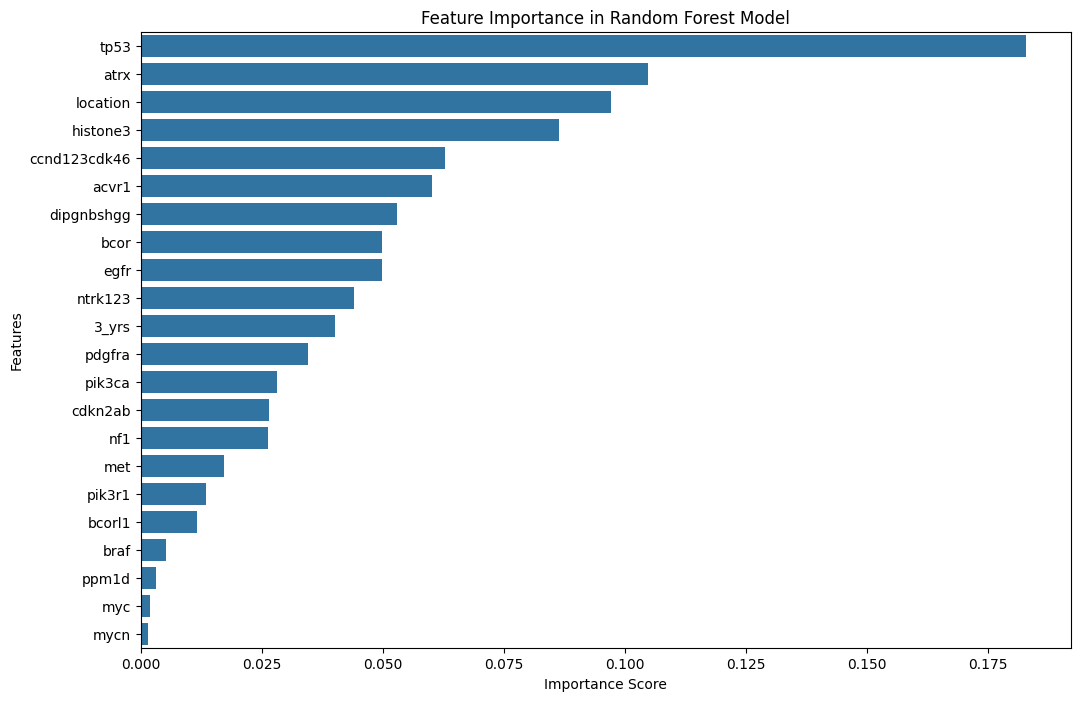

Top 10 Important Features:
         Feature  Importance
20          tp53    0.182874
5           atrx    0.104642
1       location    0.097028
4       histone3    0.086350
18  ccnd123cdk46    0.062868
3          acvr1    0.060125
0     dipgnbshgg    0.053002
6           bcor    0.049827
13          egfr    0.049717
12       ntrk123    0.044127
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.78      0.78      0.78        18
           2       0.00      0.00      0.00         1

    accuracy                           0.65        23
   macro avg       0.33      0.34      0.33        23
weighted avg       0.64      0.65      0.65        23



c:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\Projects\empy_python_package\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\Projects\empy_python_package\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\Projects\empy_python_package\venv\Lib\site-packages\sklearn\metrics\_cla

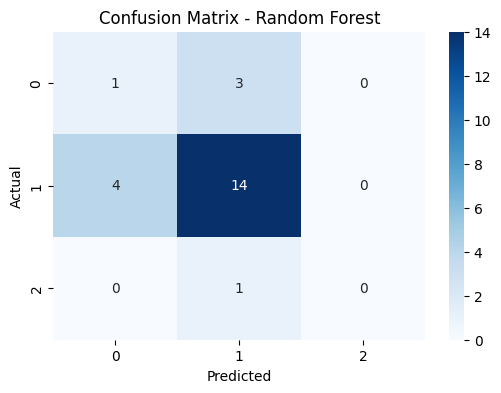

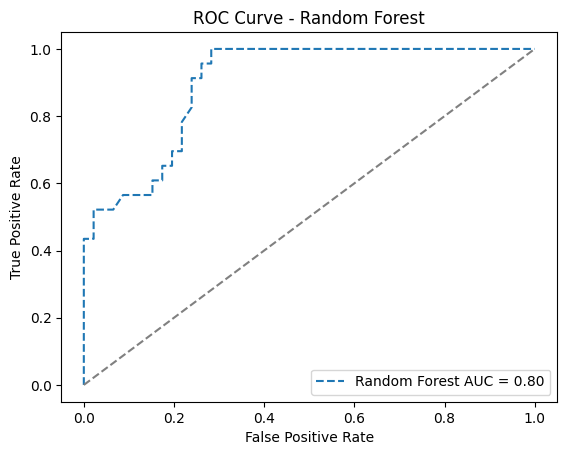

In [19]:
# Part 2- אימון מודל Random Forest וניתוח תוצאות

# ייבוא הספריות הדרושות
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# קריאת הנתונים
file_path = r"C:\Users\morel\OneDrive\שולחן העבודה\HGG_DB_cleaned.csv"
data = pd.read_csv(file_path)

# עיבוד הנתונים - הסרת עמודות לא רלוונטיות והתמודדות עם ערכים חסרים
data_cleaned = data.drop(columns=['sample']).fillna('None')

# קידוד משתנים קטגוריים
label_encoders = {}
for col in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# פיצול הנתונים לתכונות ולתוויות
X = data_cleaned.drop(columns=['tumor_grade'])
y = data_cleaned['tumor_grade']

# חלוקת הנתונים לסט אימון וסט בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# אימון מודל Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ניתוח חשיבות המשתנים
feature_importance = rf_model.feature_importances_
features = X.columns

# יצירת DataFrame עם חשיבות התכונות
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# הצגת גרף חשיבות התכונות
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df_sorted['Importance'], y=importance_df_sorted['Feature'])
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# הצגת 10 התכונות החשובות ביותר
print("Top 10 Important Features:")
print(importance_df_sorted.head(10))

# חיזוי על סט הבדיקה
y_pred_rf = rf_model.predict(X_test)

# ניתוח תוצאות המודל
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# הצגת מטריצת בלבול
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# חישוב עקומת ROC
y_proba_rf = rf_model.predict_proba(X_test)
auc_rf = roc_auc_score(pd.get_dummies(y_test), y_proba_rf, multi_class='ovr')
fpr_rf, tpr_rf, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_proba_rf.ravel())

# הצגת עקומת ה-ROC
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()





c:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\Projects\empy_python_package\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:30:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.79      0.61      0.69        18
           2       0.00      0.00      0.00         1

    accuracy                           0.57        23
   macro avg       0.36      0.37      0.35        23
weighted avg       0.66      0.57      0.60        23



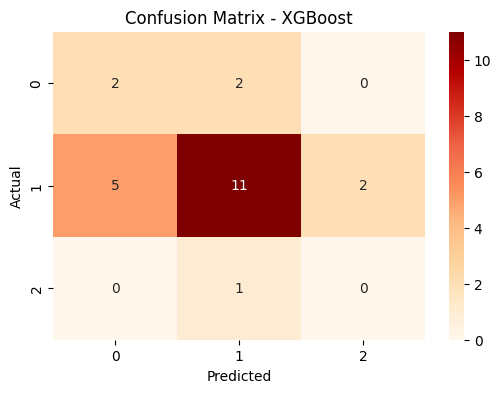

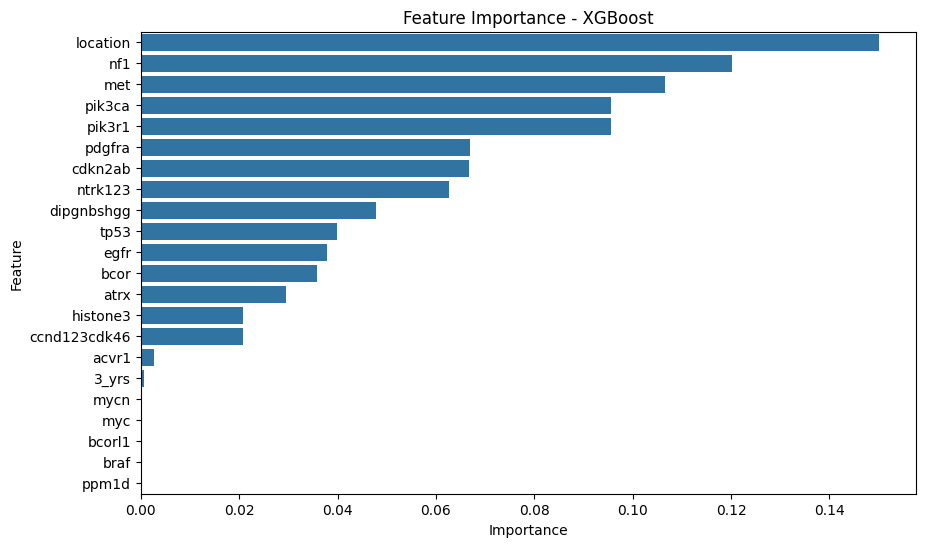

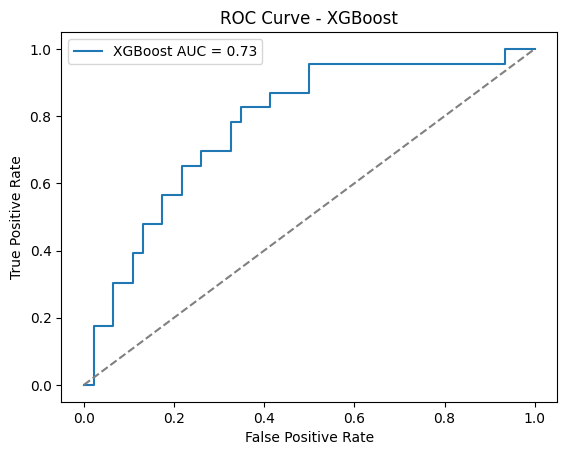

In [20]:
# Part 3-  אימון מודל XGBoost וניתוח תוצאות

from xgboost import XGBClassifier

# אימון המודל
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# חיזוי על סט הבדיקה
y_pred_xgb = xgb_model.predict(X_test)

# ניתוח תוצאות
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# מטריצת בלבול
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="OrRd")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for XGBoost
xgb_importance = xgb_model.feature_importances_
xgb_features = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importance})
xgb_features = xgb_features.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_features['Importance'], y=xgb_features['Feature'])
plt.title("Feature Importance - XGBoost")
plt.show()

# עקומת ROC
# ROC Curve for XGBoost
y_proba_xgb = xgb_model.predict_proba(X_test)
auc_xgb = roc_auc_score(pd.get_dummies(y_test), y_proba_xgb, multi_class='ovr')
fpr_xgb, tpr_xgb, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_proba_xgb.ravel())

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {auc_xgb:.2f}', linestyle='-')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()



c:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\Projects\empy_python_package\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               Accuracy  Precision    Recall  F1-score       AUC
Random Forest  0.652174   0.643478  0.652174  0.647343  0.801856
XGBoost        0.565217   0.664596  0.565217  0.601285  0.733493


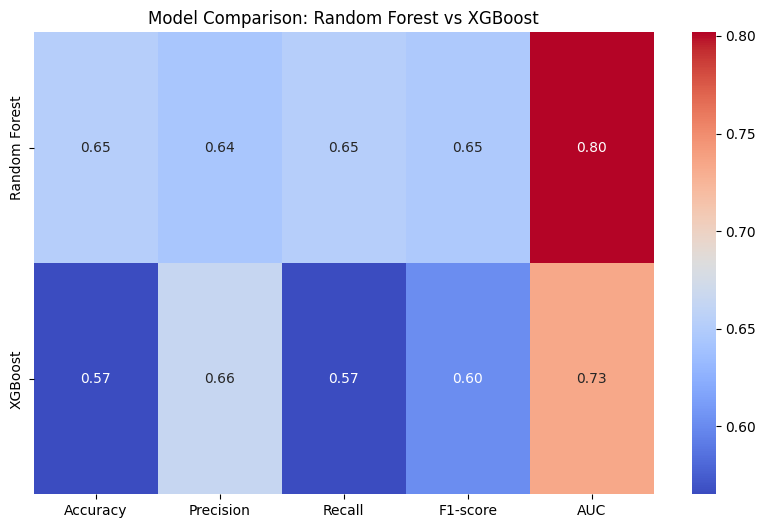

In [21]:
# Part 4- השוואת הביצועים בין המודלים
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# יצירת טבלת השוואה
comparison_metrics = {
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_xgb, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_xgb, average='weighted')
    ],
    "F1-score": [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted')
    ],
    "AUC": [
        auc_rf,
        auc_xgb
    ]
}

# הצגת ההשוואה
comparison_df = pd.DataFrame(comparison_metrics, index=['Random Forest', 'XGBoost'])
print(comparison_df)

# הצגת גרף השוואה
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Model Comparison: Random Forest vs XGBoost")
plt.show()


In [22]:
# Testing function
def test_model_performance():
    assert accuracy_score(y_test, y_pred_rf) > 0.5, "Random Forest accuracy is too low"
    assert accuracy_score(y_test, y_pred_xgb) > 0.5, "XGBoost accuracy is too low"
    print("All tests passed successfully!")

test_model_performance()

All tests passed successfully!
